In [2]:
#Import everything
import Main.test_manifold_algorithms as tma
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from Helpers.regression_helpers import *

# Baseline Visualization

In [3]:
baselines_cross = pd.read_csv("/yunity/arusty/Graph-Manifold-Alignment/Results/RegressionData/BaselineData.csv")
baselines = pd.read_csv("/yunity/arusty/Graph-Manifold-Alignment/Results/RegressionData/BaselineDataOnSample.csv")
baselines.sample(5)

,csv_file,split,KNN,A_Classification_Score,B_Classification_Score
681,AirfoilSelfNoise,skewed,33,0.073417,0.467367
355,FacebookMetrics,distort,52,0.393665,0.392011
625,ConcreteCompressiveStrength,even,107,0.364009,0.470627
618,ConcreteCompressiveStrength,random,170,0.119226,0.317364
232,SML2010,even,168,0.863647,0.537220


In [4]:
baselines_grouped = baselines.groupby(by = ["csv_file", "split"]).max().drop(columns = ["KNN"]).reset_index()
baselines_grouped[baselines_grouped["csv_file"] == "Hydrodynamics"]

,csv_file,split,A_Classification_Score,B_Classification_Score
45,Hydrodynamics,distort,0.944973,0.895982
46,Hydrodynamics,even,0.000619,0.988501
47,Hydrodynamics,random,-0.002573,0.940687
48,Hydrodynamics,skewed,-0.000754,0.983942
49,Hydrodynamics,turn,0.944973,0.944830


<Axes: xlabel='csv_file'>

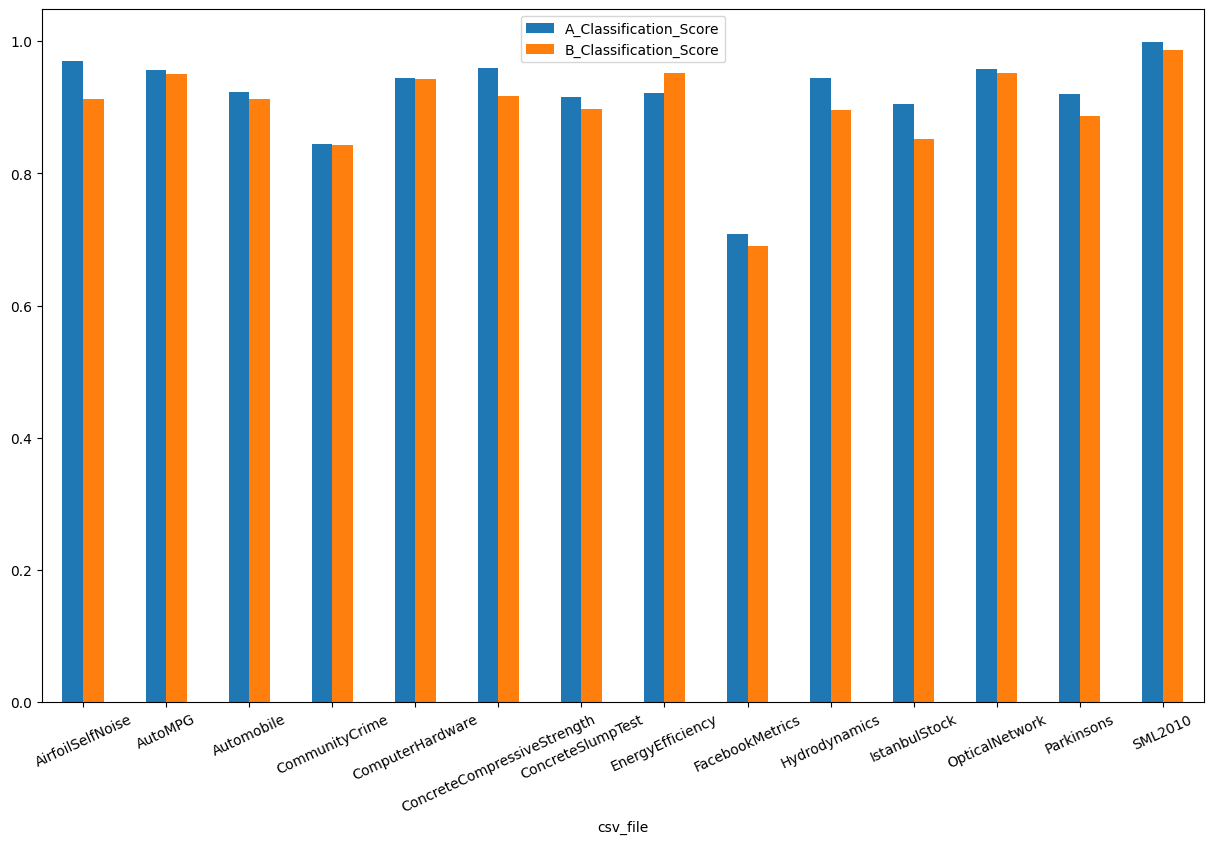

In [5]:
baselines_grouped[baselines_grouped["split"] == "distort"].set_index("csv_file").plot(kind = "bar", subplots=False, figsize=(15,9), rot= 25)
#Keep in mind that these are trained on one domain, then tested on the other. 

# Model Comparison

In [6]:
reg_df = read_json_files_to_dataframe("/yunity/arusty/Graph-Manifold-Alignment/Results/RegressionData")
reg_df.sample(5)


,method,csv_file,split,Percent_of_Anchors,Best_Params,CE,FOSCTTM,Random Forest OOB,Random Forest Emb,Nearest Neighbor,Nearest Neighbor (F1 score or RMSE),Random Forest (F1 score or RMSE),GRAE,Parameter STD
18,RF-SPUD,EnergyEfficiency,distort,0.3,"{'knn': 2, 'OD_method': 'mean', 'agg_method': ...","{'42': -0.192470811818084, '1738': -0.21458469...","{'42': 0.0006476508246527779, '1738': 0.000751...","{'42': -0.04180558303252302, '1738': -0.058410...","{'42': -0.0639167528812914, '1738': 0.00451963...","{'42': -0.013287707883772759, '1738': -0.00538...","{'42': 1.0185318480465209, '1738': 1.013521904...","{'42': 1.0436672363117654, '1738': 1.008518288...","{'42': {'RF-OOB': 0.07738437212905391, 'KNN': ...",{}
1,RF-SPUD,Hydrodynamics,distort,0.3,"{'knn': 2, 'OD_method': 'absolute_distance', '...","{'42': -0.044130441760193095, '1738': -0.02059...","{'42': 0.0007695226851071006, '1738': 0.000600...","{'42': 0.008920455376862035, '1738': 0.2848365...","{'42': 0.02210098373669145, '1738': 0.25133891...","{'42': 0.07384477770436537, '1738': 0.20546805...","{'42': 0.7737828133995848, '1738': 0.970691527...","{'42': 0.7951044680800408, '1738': 0.942254429...","{'42': {'RF-OOB': 0.25356426137824095, 'KNN': ...",{}
12,RF-NAMA,EnergyEfficiency,distort,0.3,"{'OD_method': 'absolute_distance', 'agg_method...","{'42': -0.13461892395456942, '1738': -0.168589...","{'42': 0.0012139214409722222, '1738': 0.001893...","{'42': -0.07127906095629388, '1738': -0.059872...","{'42': -0.019851230330367287, '1738': -0.05404...","{'42': -0.01663770379088847, '1738': -0.038411...","{'42': 1.0202141254538202, '1738': 1.030035584...","{'42': 1.0218252689674507, '1738': 1.037760781...","{'42': {'RF-OOB': 0.08598673712538951, 'KNN': ...",{}
6,RF-SPUD,Hydrodynamics,distort,0.3,"{'knn': 2, 'OD_method': 'default', 'agg_method...","{'42': -0.22906947340393513, '1738': -0.227571...","{'42': 0.01633918030021926, '1738': 0.02391845...","{'42': 0.0483303780676102, '1738': 0.119160069...","{'42': -0.051611512506203105, '1738': 0.106704...","{'42': -0.029246951269490173, '1738': 0.044540...","{'42': 0.8157122492209115, '1738': 1.064465612...","{'42': 0.8245269499977367, '1738': 1.029255279...","{'42': {'RF-OOB': 0.22559592825996888, 'KNN': ...",{}
16,RF-MASH,EnergyEfficiency,distort,0.3,"{'knn': 2, 'page_rank': 'off-diagonal', 'DTM':...","{'42': 0.8903677234761569, '1738': 0.891101158...","{'42': 0.0020887586805555555, '1738': 0.002088...","{'42': 0.9536350861602345, '1738': 0.956266135...","{'42': 0.9208142318441904, '1738': 0.932283633...","{'42': 0.9097281243252224, '1738': 0.902997575...","{'42': 0.3040076129619127, '1738': 0.314817396...","{'42': 0.2847290592424392, '1738': 0.263035430...","{'42': {'RF-OOB': 0.9559451802993845, 'KNN': 0...","{'connection_limit': 0.004402114867886711, 'th..."


In [7]:
proc_reg_df = reg_df.drop(columns = ["Best_Params", "Parameter STD"])

#Average out the random seeds
for columns in ["CE", "FOSCTTM", "Random Forest OOB", "Random Forest Emb", "Nearest Neighbor", "Nearest Neighbor (F1 score or RMSE)", "Random Forest (F1 score or RMSE)"]:
    proc_reg_df[columns] = [np.mean(list(d.values())) for d in proc_reg_df[columns].values]

proc_reg_df["Combined_Metric"] = proc_reg_df["CE"] - proc_reg_df["FOSCTTM"]
proc_reg_df = proc_reg_df.merge(baselines_grouped, how = "left")

In [8]:
proc_reg_df.sample(3)

,method,csv_file,split,Percent_of_Anchors,CE,FOSCTTM,Random Forest OOB,Random Forest Emb,Nearest Neighbor,Nearest Neighbor (F1 score or RMSE),Random Forest (F1 score or RMSE),GRAE,Combined_Metric,A_Classification_Score,B_Classification_Score
15,SPUD,EnergyEfficiency,distort,0.3,-0.122096,0.000005,0.681589,0.673537,0.550795,0.679764,0.578773,"{'42': {'RF-OOB': 0.6132805129584676, 'KNN': 0...",-0.122101,0.921075,0.952433
6,RF-SPUD,Hydrodynamics,distort,0.3,-0.218909,0.022154,0.070520,-0.065796,-0.051154,0.946531,0.953889,"{'42': {'RF-OOB': 0.22559592825996888, 'KNN': ...",-0.241063,0.944973,0.895982
9,RF-SPUD,Hydrodynamics,distort,0.3,0.932466,0.000230,0.893831,0.865008,0.885891,0.293929,0.334495,"{'42': {'RF-OOB': 0.8799296150756856, 'KNN': 0...",0.932236,0.944973,0.895982


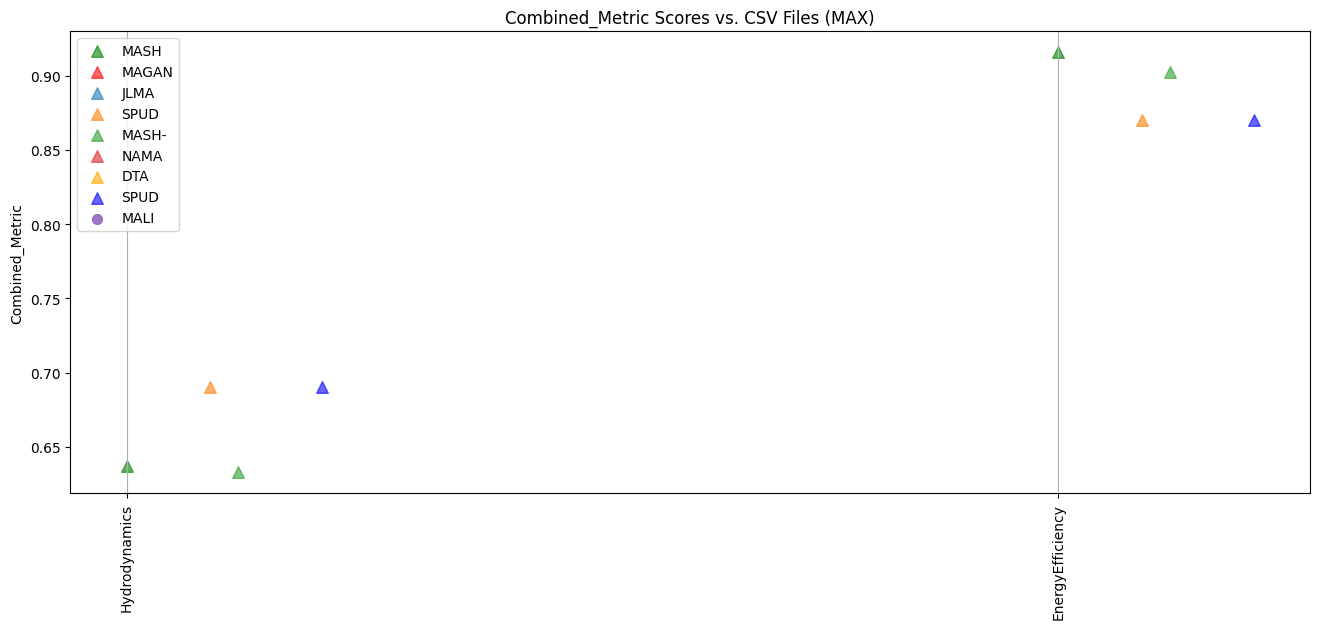

In [9]:
plt_methods_by_CSV_max(df = proc_reg_df, plot_methods=["MASH", "NAMA", "MALI", "SPUD", "MASH-", "BL_A-B", "BL_B-A", "MAGAN", "JLMA", "DTA"])

In [10]:
proc_reg_df["method"].nunique()

7

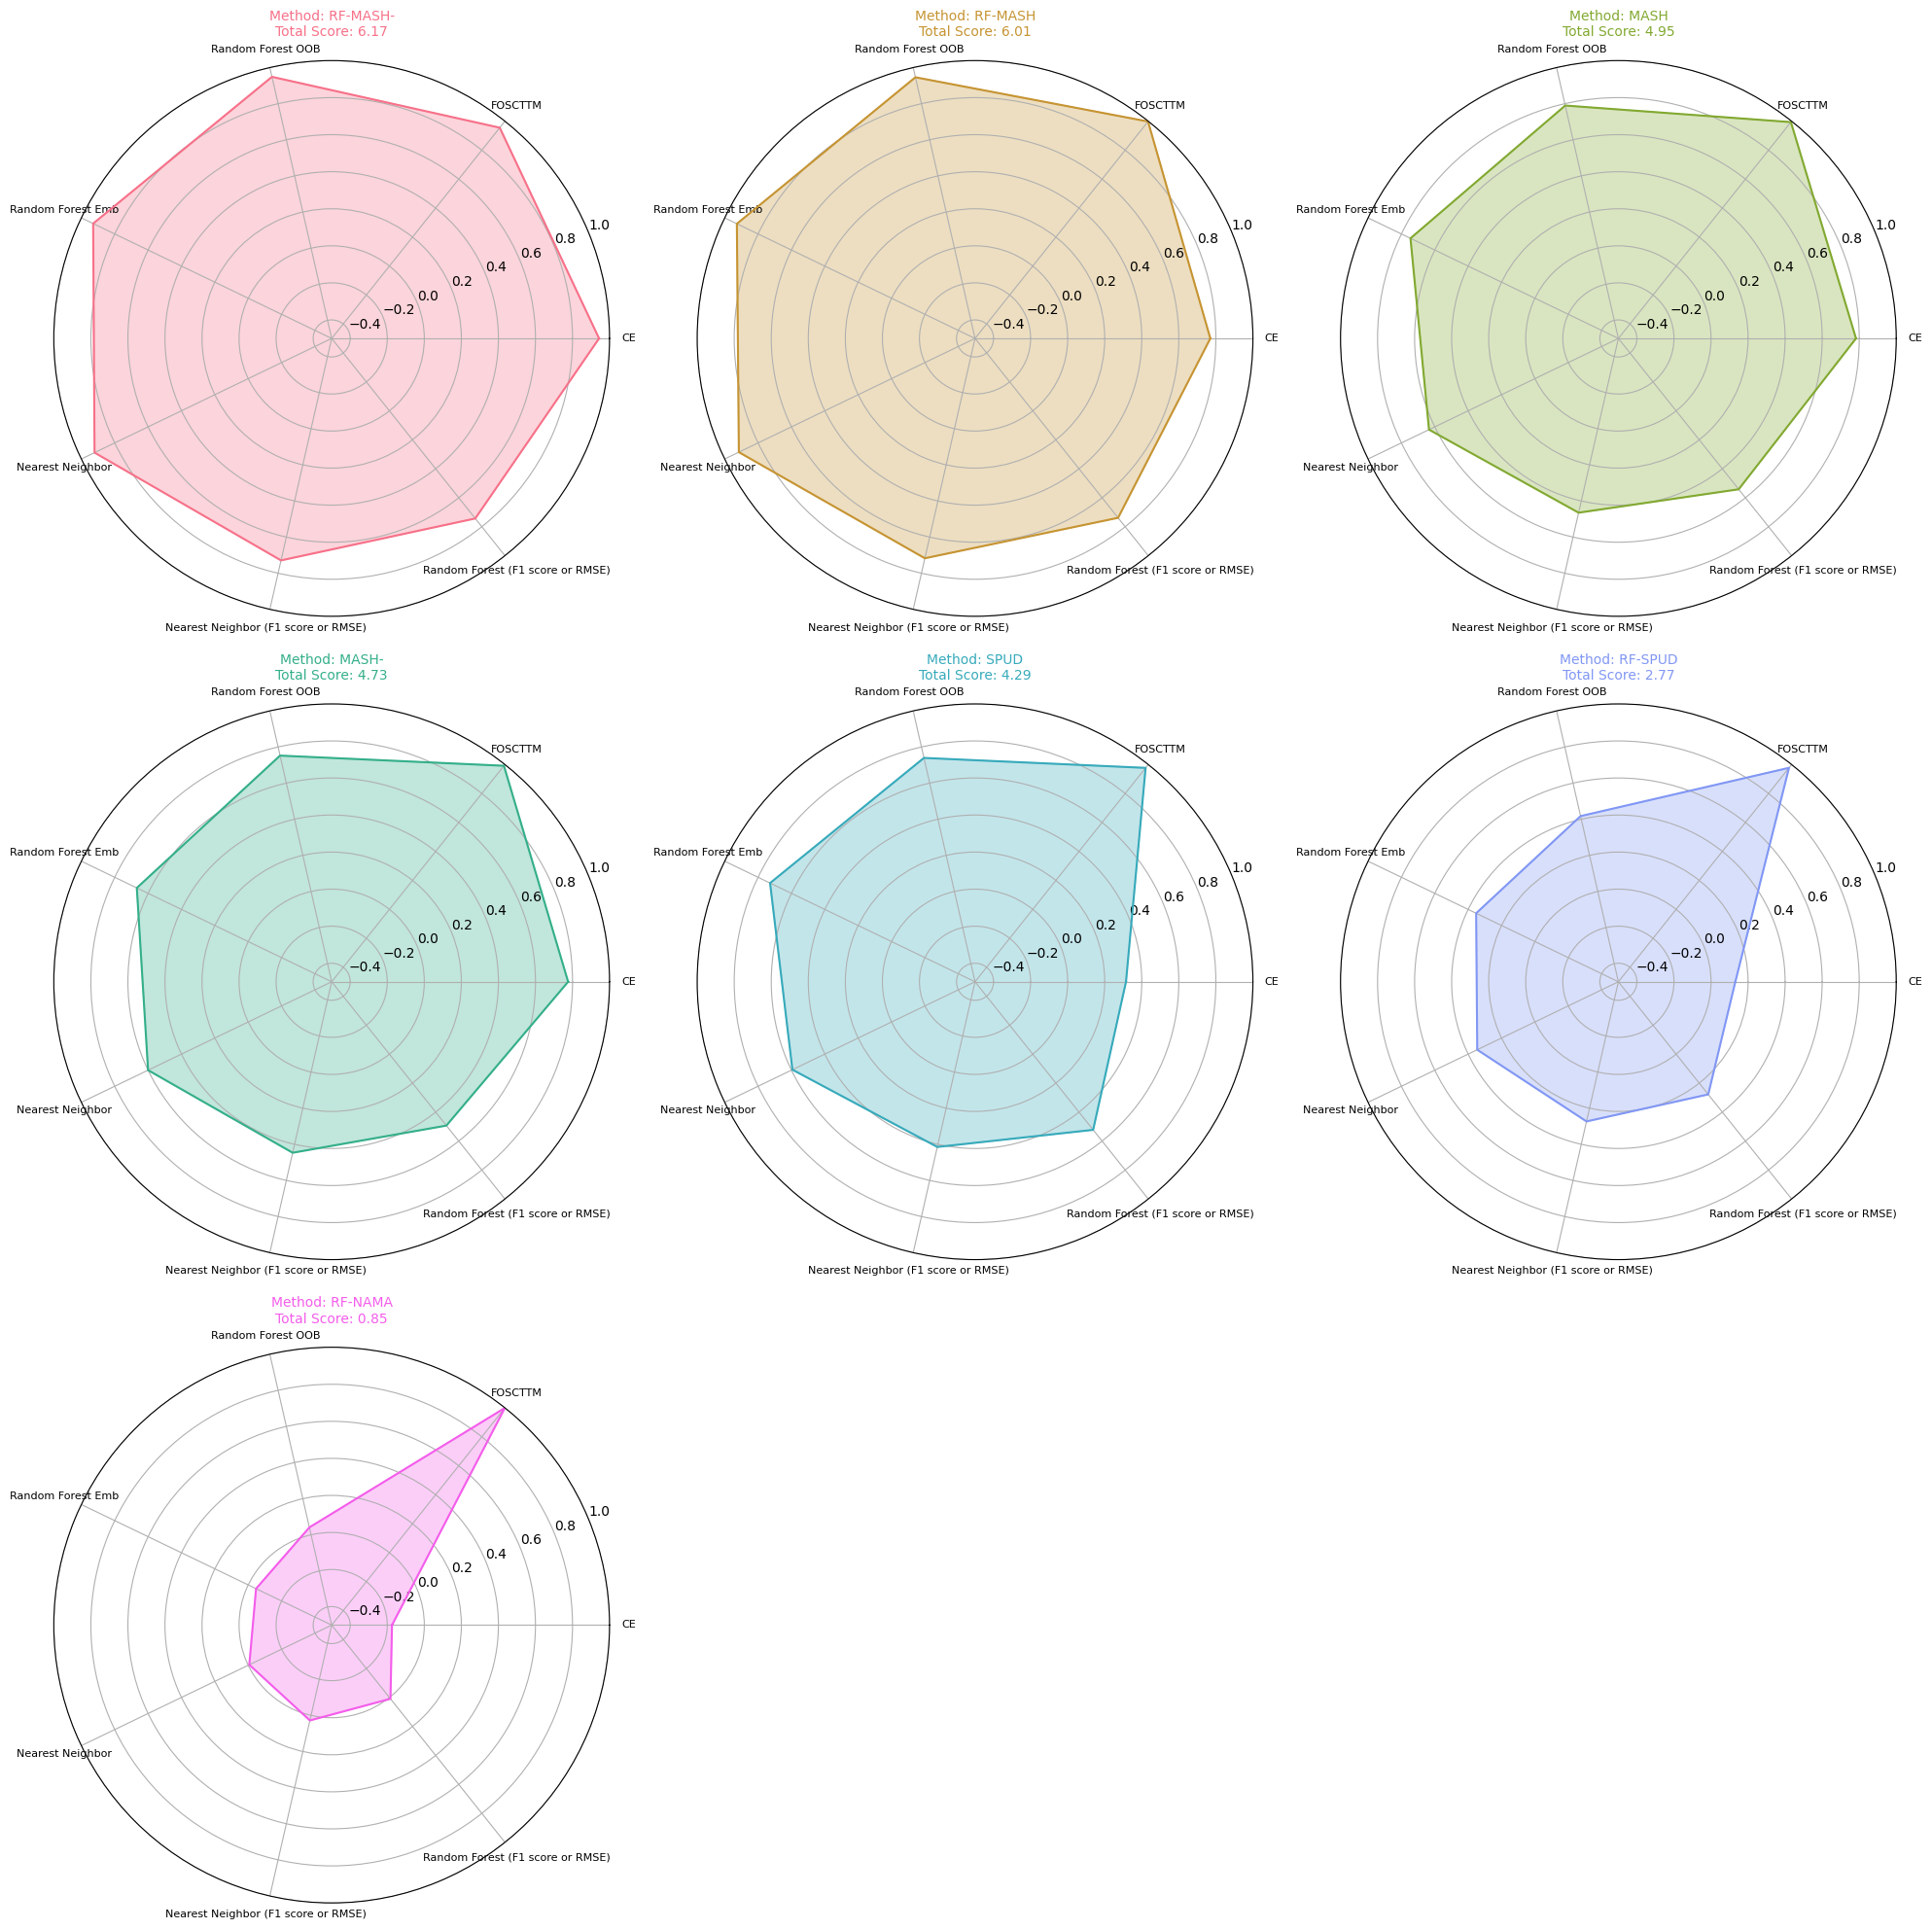

In [11]:
plot_radial(proc_reg_df, ['CE', 'FOSCTTM', 'Random Forest OOB', 'Random Forest Emb', 'Nearest Neighbor',
                          'Nearest Neighbor (F1 score or RMSE)', 'Random Forest (F1 score or RMSE)'])

## Veiw GRAE

In [12]:
proc_reg_df.sample(2)

,method,csv_file,split,Percent_of_Anchors,CE,FOSCTTM,Random Forest OOB,Random Forest Emb,Nearest Neighbor,Nearest Neighbor (F1 score or RMSE),Random Forest (F1 score or RMSE),GRAE,Combined_Metric,A_Classification_Score,B_Classification_Score
10,RF-MASH,Hydrodynamics,distort,0.3,0.650562,0.002266,0.938655,0.927724,0.918256,0.264785,0.247597,"{'42': {'RF-OOB': 0.951395012748623, 'KNN': 0....",0.648295,0.944973,0.895982
20,SPUD,EnergyEfficiency,distort,0.3,0.105244,0.138792,0.892437,0.894688,0.869719,0.365990,0.329129,"{'42': {'RF-OOB': 0.8892835284926973, 'KNN': 0...",-0.033548,0.921075,0.952433


In [13]:
grae_expanded = pd.json_normalize(proc_reg_df['GRAE'])
# Rename columns by dropping the prefix before the dot
grae_expanded.columns = ["Grae-" + col.split(".", 1)[-1] for col in grae_expanded.columns]

# Calculate mean for each unique suffix
mean_scores = grae_expanded.groupby(grae_expanded.columns, axis=1).mean()
mean_scores.sample(2)


,Grae-KNN,Grae-KNN-metric,Grae-RF,Grae-RF-OOB,Grae-RF-metric
14,0.894573,0.328397,0.899300,0.908150,0.320739
9,0.847599,0.307485,0.837977,0.922748,0.318634


In [14]:
full_data = proc_reg_df.drop(columns = ["GRAE"]).join(mean_scores, on = None)
full_data.sample(2)

,method,csv_file,split,Percent_of_Anchors,CE,FOSCTTM,Random Forest OOB,Random Forest Emb,Nearest Neighbor,Nearest Neighbor (F1 score or RMSE),Random Forest (F1 score or RMSE),Combined_Metric,A_Classification_Score,B_Classification_Score,Grae-KNN,Grae-KNN-metric,Grae-RF,Grae-RF-OOB,Grae-RF-metric
5,SPUD,Hydrodynamics,distort,0.3,0.267451,0.000264,0.499459,0.472877,0.364217,0.728364,0.637946,0.267187,0.944973,0.895982,0.187413,0.724455,0.305868,0.506355,0.669138
20,SPUD,EnergyEfficiency,distort,0.3,0.105244,0.138792,0.892437,0.894688,0.869719,0.365990,0.329129,-0.033548,0.921075,0.952433,0.880859,0.349249,0.920160,0.895356,0.285818


In [15]:
full_data.columns

Index(['method', 'csv_file', 'split', 'Percent_of_Anchors', 'CE', 'FOSCTTM',
       'Random Forest OOB', 'Random Forest Emb', 'Nearest Neighbor',
       'Nearest Neighbor (F1 score or RMSE)',
       'Random Forest (F1 score or RMSE)', 'Combined_Metric',
       'A_Classification_Score', 'B_Classification_Score', 'Grae-KNN',
       'Grae-KNN-metric', 'Grae-RF', 'Grae-RF-OOB', 'Grae-RF-metric'],
      dtype='object')

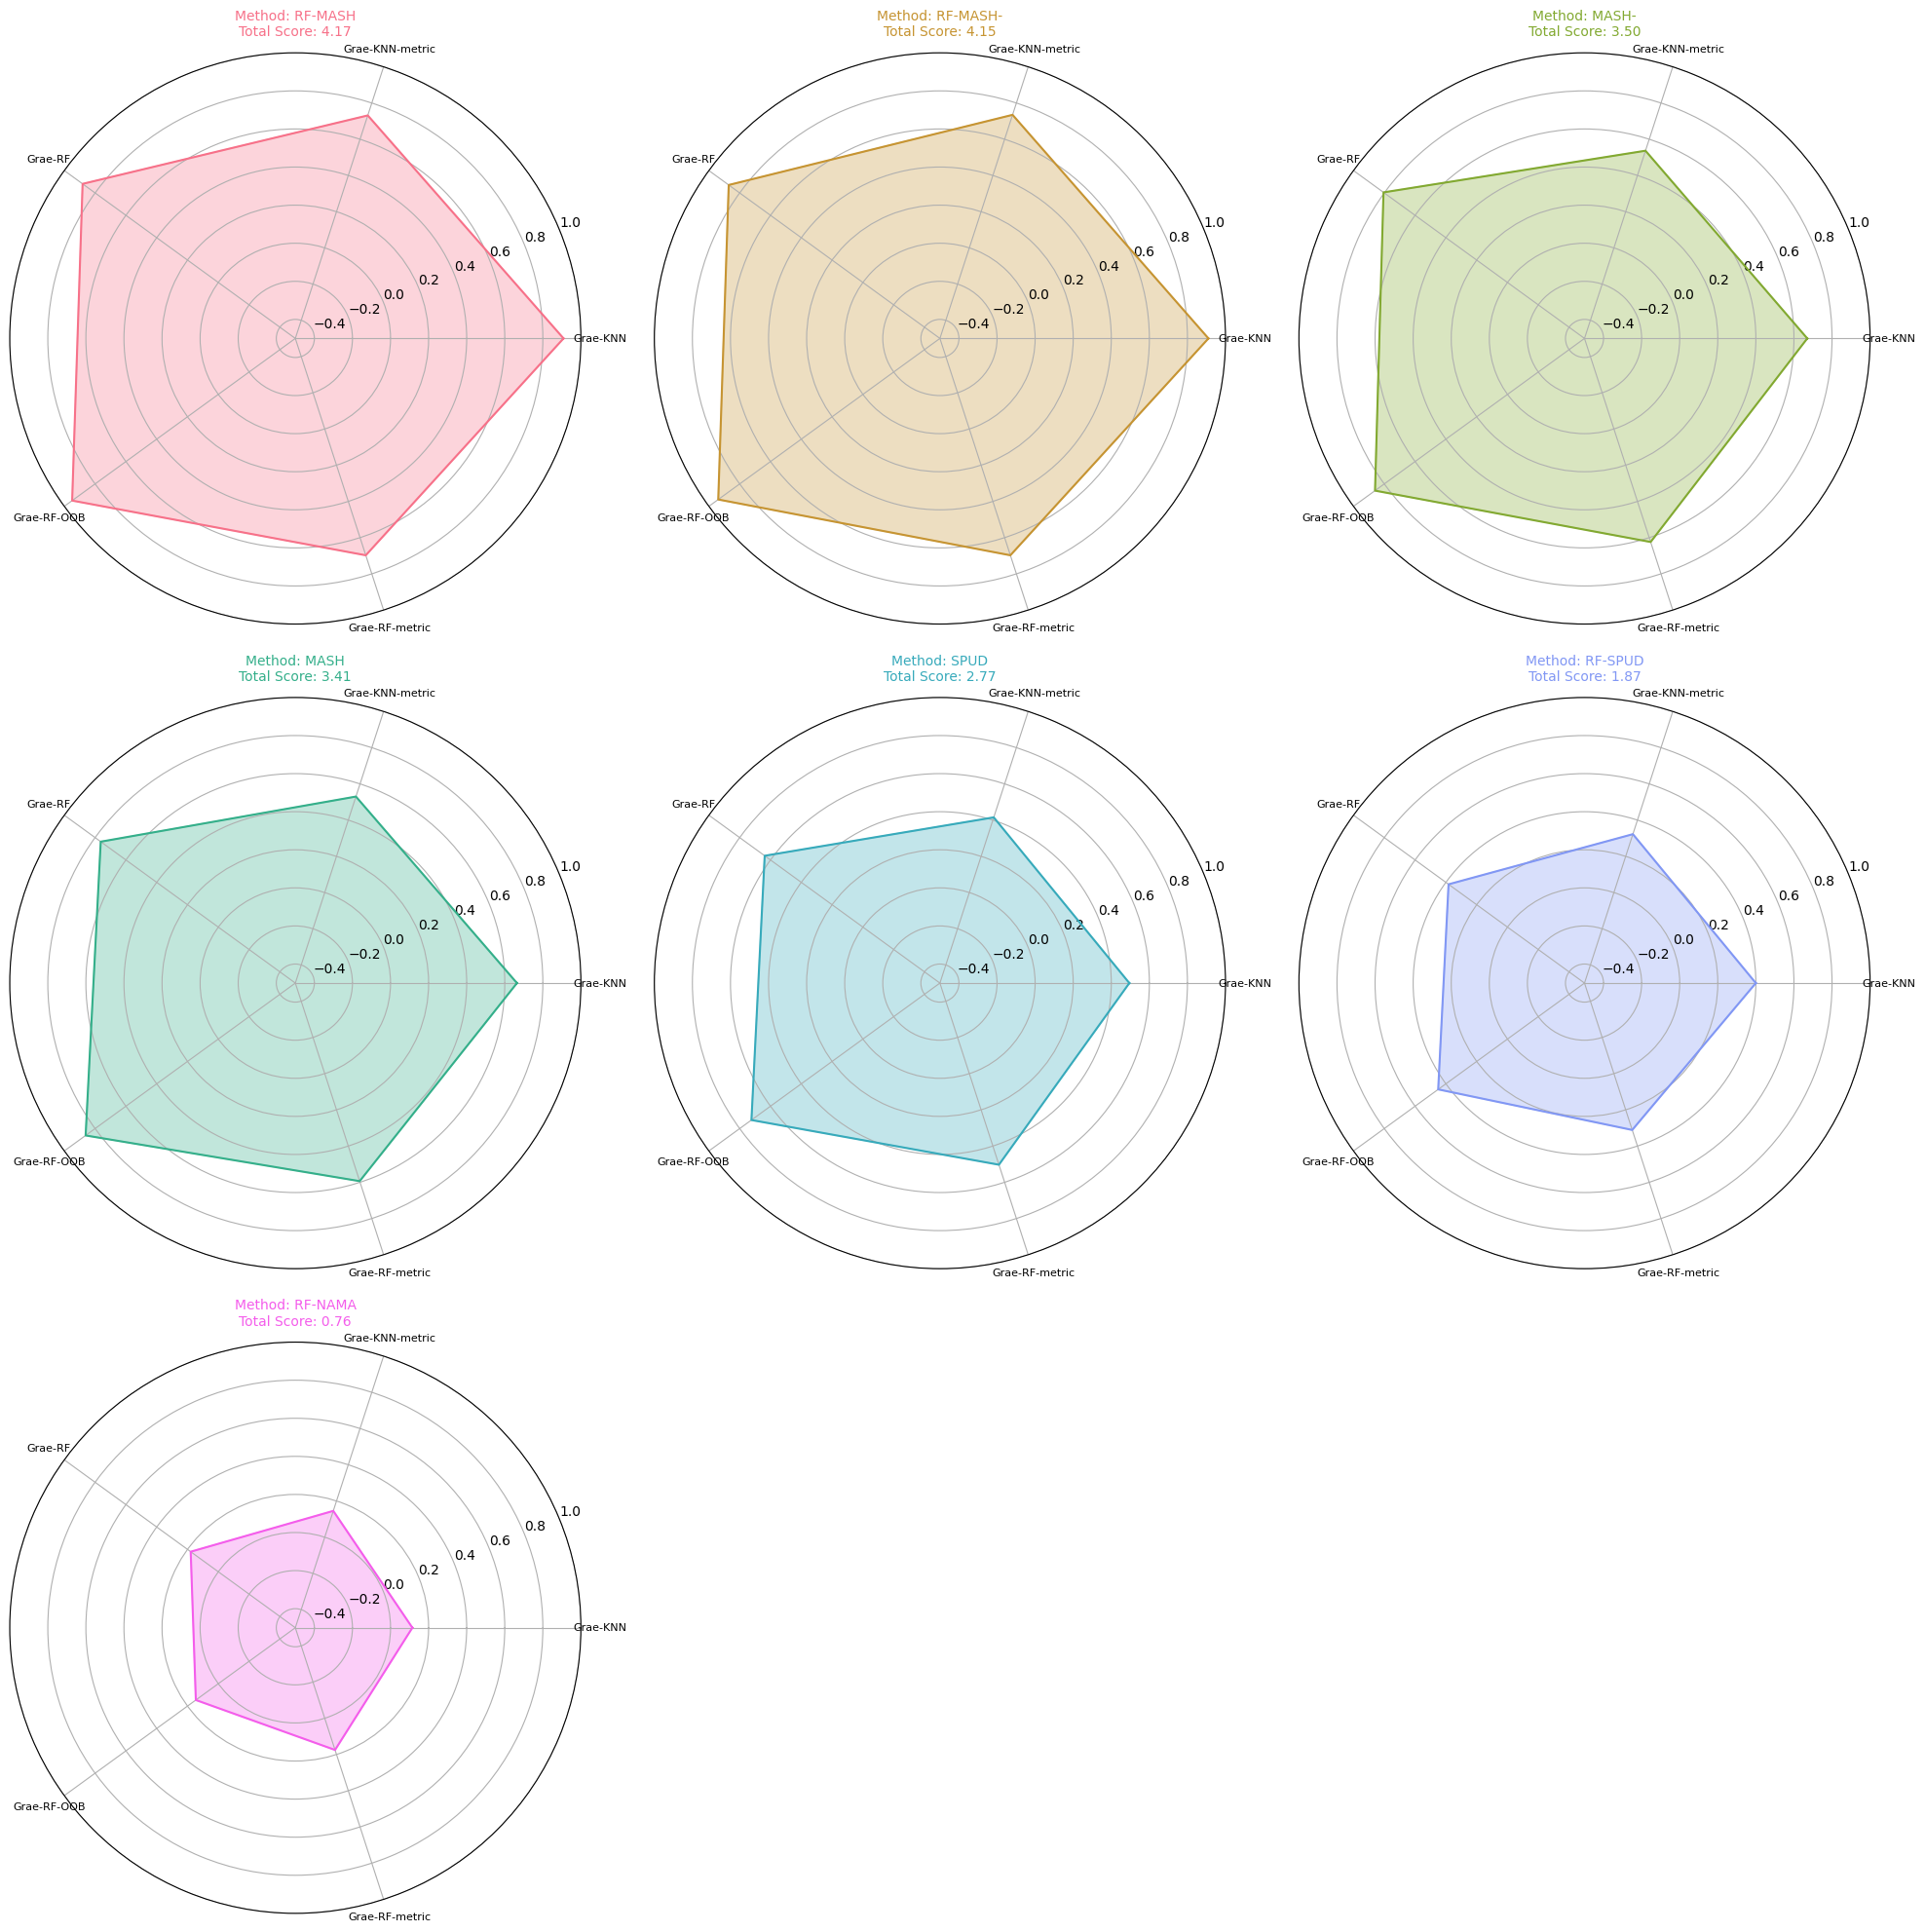

In [16]:
plot_radial(full_data, [#'CE', 'FOSCTTM', 'Random Forest OOB', 'Random Forest Emb', 'Nearest Neighbor',
                          #'Nearest Neighbor (F1 score or RMSE)', 'Random Forest (F1 score or RMSE)',
                          'Grae-KNN', 'Grae-KNN-metric', 'Grae-RF', 'Grae-RF-OOB', 'Grae-RF-metric'])

# Compare Grae to RF Extend

In [17]:
full_data.sample(2)

,method,csv_file,split,Percent_of_Anchors,CE,FOSCTTM,Random Forest OOB,Random Forest Emb,Nearest Neighbor,Nearest Neighbor (F1 score or RMSE),Random Forest (F1 score or RMSE),Combined_Metric,A_Classification_Score,B_Classification_Score,Grae-KNN,Grae-KNN-metric,Grae-RF,Grae-RF-OOB,Grae-RF-metric
18,RF-SPUD,EnergyEfficiency,distort,0.3,-0.208233,0.000581,-0.035852,-0.028886,-0.003295,1.016238,1.029087,-0.208814,0.921075,0.952433,0.066742,0.977298,-0.057896,0.078955,1.040264
1,RF-SPUD,Hydrodynamics,distort,0.3,-0.111651,0.000578,0.109798,-0.028867,0.026160,0.913783,0.933782,-0.112229,0.944973,0.895982,0.293236,0.675014,0.335470,0.255644,0.652477


In [22]:
help(full_data.groupby)

Help on method groupby in module pandas.core.frame:

groupby(by=None, axis: 'Axis' = 0, level: 'IndexLabel | None' = None, as_index: 'bool' = True, sort: 'bool' = True, group_keys: 'bool' = True, observed: 'bool' = False, dropna: 'bool' = True) -> 'DataFrameGroupBy' method of pandas.core.frame.DataFrame instance
    Group DataFrame using a mapper or by a Series of columns.
    
    A groupby operation involves some combination of splitting the
    object, applying a function, and combining the results. This can be
    used to group large amounts of data and compute operations on these
    groups.
    
    Parameters
    ----------
    by : mapping, function, label, pd.Grouper or list of such
        Used to determine the groups for the groupby.
        If ``by`` is a function, it's called on each value of the object's
        index. If a dict or Series is passed, the Series or dict VALUES
        will be used to determine the groups (the Series' values are first
        aligned; see ``

In [36]:
group_df = full_data.drop(columns = ["csv_file", "split", "Percent_of_Anchors", "A_Classification_Score", "B_Classification_Score"]).groupby(by = "method").mean()
group_df#.plot( )

,CE,FOSCTTM,Random Forest OOB,Random Forest Emb,Nearest Neighbor,Nearest Neighbor (F1 score or RMSE),Random Forest (F1 score or RMSE),Combined_Metric,Grae-KNN,Grae-KNN-metric,Grae-RF,Grae-RF-OOB,Grae-RF-metric
method,,,,,,,,,,,,,
MASH,0.782635,0.006214,0.789590,0.745663,0.634638,0.535100,0.458382,0.776421,0.664069,0.470054,0.763368,0.861515,0.406240
MASH-,0.776369,0.008671,0.752303,0.667546,0.600095,0.553186,0.506919,0.767698,0.670125,0.463491,0.804957,0.859999,0.375905
RF-MASH,0.770196,0.002178,0.946118,0.926923,0.915062,0.282757,0.261413,0.768018,0.908733,0.268577,0.881041,0.948902,0.302491
RF-MASH-,0.943385,0.044860,0.948566,0.929180,0.920778,0.270925,0.256849,0.898525,0.910429,0.265326,0.871063,0.939117,0.302502
RF-NAMA,-0.174360,0.000829,0.040926,-0.046928,-0.006305,0.971986,0.991064,-0.175189,0.114751,0.854878,0.179354,0.145942,0.825066
RF-SPUD,0.131366,0.022880,0.417262,0.352223,0.345673,0.726607,0.722138,0.108486,0.399880,0.677667,0.382597,0.449828,0.688867
SPUD,0.315006,0.023179,0.739490,0.728016,0.594160,0.585235,0.477368,0.291828,0.494894,0.584928,0.637562,0.723683,0.496955


In [40]:
group_df.columns

Index(['CE', 'FOSCTTM', 'Random Forest OOB', 'Random Forest Emb',
       'Nearest Neighbor', 'Nearest Neighbor (F1 score or RMSE)',
       'Random Forest (F1 score or RMSE)', 'Combined_Metric', 'Grae-KNN',
       'Grae-KNN-metric', 'Grae-RF', 'Grae-RF-OOB', 'Grae-RF-metric'],
      dtype='object')

In [ ]:
rf_extend = group_df[['Random Forest OOB', 'Random Forest Emb', 'Nearest Neighbor', 'Nearest Neighbor (F1 score or RMSE)', 'Random Forest (F1 score or RMSE)']]  
grae = group_df[['Grae-KNN', 'Grae-KNN-metric', 'Grae-RF', 'Grae-RF-OOB', 'Grae-RF-metric']]

In [48]:
rf_extend.values - grae.values

array([[ 0.12552108,  0.27560863, -0.12872976, -0.32641526,  0.05214219],
       [ 0.08217792,  0.20405514, -0.20486135, -0.30681351,  0.13101382],
       [ 0.03738449,  0.65834641,  0.03402125, -0.66614438, -0.04107735],
       [ 0.03813705,  0.66385435,  0.04971561, -0.66819223, -0.0456533 ],
       [-0.0738247 , -0.90180532, -0.18565866,  0.82604375,  0.16599754],
       [ 0.01738224, -0.32544375, -0.03692359,  0.27677851,  0.03327044],
       [ 0.24459599,  0.14308798, -0.04340159, -0.13844804, -0.01958738]])

# Veiw Feature variance

In [14]:
reg_df = read_json_files_to_dataframe("/yunity/arusty/Graph-Manifold-Alignment/Results/RegressionData")

#Average out the random seeds
reg_df["CE"] = [np.mean(list(d.values())) for d in reg_df["CE"].values]
reg_df["FOSCTTM"] = [np.mean(list(d.values())) for d in reg_df["FOSCTTM"].values]
reg_df["Combined_Metric"] = reg_df["CE"] - reg_df["FOSCTTM"]
reg_df.sample(2)

,method,csv_file,split,Percent_of_Anchors,Best_Params,CE,FOSCTTM,Random Forest OOB,Random Forest Emb,Nearest Neighbor,Nearest Neighbor (F1 score or RMSE),Random Forest (F1 score or RMSE),GRAE,Parameter STD,Combined_Metric
20,SPUD,EnergyEfficiency,distort,0.3,"{'knn': 50, 'OD_method': 'default', 'agg_metho...",0.105244,0.138792,"{'42': 0.8934832394009449, '1738': 0.889359353...","{'42': 0.9017677456008442, '1738': 0.897023644...","{'42': 0.8788615622136637, '1738': 0.875103486...","{'42': 0.35216744823618157, '1738': 0.35722561...","{'42': 0.31712850610047005, '1738': 0.32436664...","{'42': {'RF-OOB': 0.8892835284926973, 'KNN': 0...","{'knn': 0.1573179623969318, 'OD_method': 0.014...",-0.033548
6,RF-SPUD,Hydrodynamics,distort,0.3,"{'knn': 2, 'OD_method': 'default', 'agg_method...",-0.218909,0.022154,"{'42': 0.0483303780676102, '1738': 0.119160069...","{'42': -0.051611512506203105, '1738': 0.106704...","{'42': -0.029246951269490173, '1738': 0.044540...","{'42': 0.8157122492209115, '1738': 1.064465612...","{'42': 0.8245269499977367, '1738': 1.029255279...","{'42': {'RF-OOB': 0.22559592825996888, 'KNN': ...",{},-0.241063


### Spud Parameters on STD

In [15]:
spud_param_df = pd.DataFrame(list(reg_df[reg_df["method"] == "SPUD"]["Parameter STD"].values))
spud_param_df

,knn,OD_method,agg_method
0,0.212055,0.009160,0.259480
1,0.577733,0.393837,0.167933
2,0.427449,0.009660,0.007884
3,0.186849,0.005080,0.041793
4,0.028438,0.035193,0.005254
5,0.157318,0.014712,0.074048


<Axes: >

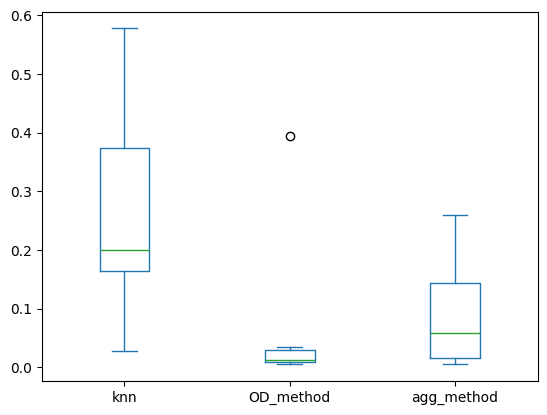

In [16]:
spud_param_df.plot(kind = "box") #This is showing how the std fluctuates between datasets

## MASH Parameters on STD

In [17]:
mash_minus_param_df = pd.DataFrame(list(reg_df[reg_df["method"] == "MASH-"]["Parameter STD"].values))
mash_minus_param_df

,knn,page_rank,DTM,density_normalization
0,0.238521,0.004086,0.058360,0.0
1,0.059996,0.000567,0.056766,0.0


<Axes: >

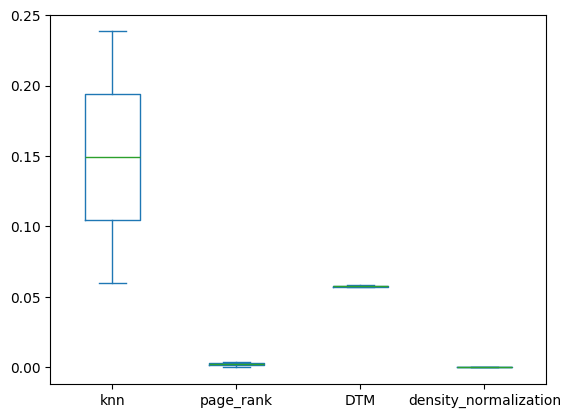

In [18]:
mash_minus_param_df.plot(kind = "box") #This is showing how the std fluctuates between datasets

In [19]:
mash_param_df = pd.DataFrame(list(reg_df[reg_df["method"] == "MASH"]["Parameter STD"].values))
mash_param_df

,connection_limit,threshold,epochs
0,0.0,0.0,0.0
1,0.0,0.0,0.0


<Axes: >

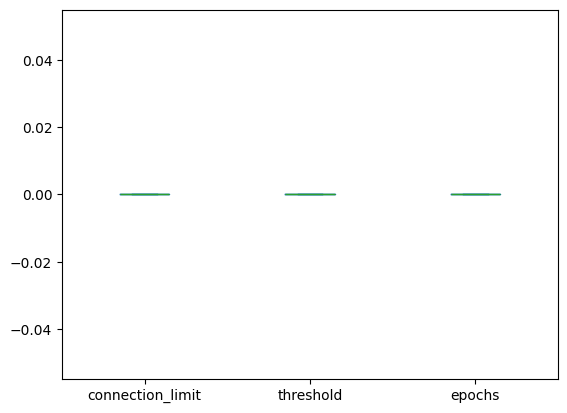

In [20]:
mash_param_df.plot(kind = "box") 